In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib notebook

In [22]:
df_1718 = pd.read_csv('https://raw.githubusercontent.com/2803Aditya/Manchester-Derby-Win-Percentage/master/season-0910_csv.csv', usecols = ['Date', 'HomeTeam', 'AwayTeam', 'FTR'])
df_1819 = pd.read_csv('https://raw.githubusercontent.com/2803Aditya/Manchester-Derby-Win-Percentage/master/season-1011_csv.csv', usecols = ['Date', 'HomeTeam', 'AwayTeam', 'FTR'])
df_1415 = pd.read_csv('https://raw.githubusercontent.com/2803Aditya/Manchester-Derby-Win-Percentage/master/season-1112_csv.csv', usecols = ['Date', 'HomeTeam', 'AwayTeam', 'FTR'])
df_1516 = pd.read_csv('https://raw.githubusercontent.com/2803Aditya/Manchester-Derby-Win-Percentage/master/season-1213_csv.csv', usecols = ['Date', 'HomeTeam', 'AwayTeam', 'FTR'])
df_1617 = pd.read_csv('https://raw.githubusercontent.com/2803Aditya/Manchester-Derby-Win-Percentage/master/season-1314_csv.csv', usecols = ['Date', 'HomeTeam', 'AwayTeam', 'FTR'])
df_0910 = pd.read_csv('https://raw.githubusercontent.com/2803Aditya/Manchester-Derby-Win-Percentage/master/season-1415_csv.csv', usecols = ['Date', 'HomeTeam', 'AwayTeam', 'FTR'])
df_1011 = pd.read_csv('https://raw.githubusercontent.com/2803Aditya/Manchester-Derby-Win-Percentage/master/season-1617_csv.csv', usecols = ['Date', 'HomeTeam', 'AwayTeam', 'FTR'])
df_1112 = pd.read_csv('https://raw.githubusercontent.com/2803Aditya/Manchester-Derby-Win-Percentage/master/season-1718_csv.csv', usecols = ['Date', 'HomeTeam', 'AwayTeam', 'FTR'])
df_1213 = pd.read_csv('https://raw.githubusercontent.com/2803Aditya/Manchester-Derby-Win-Percentage/master/season-1819_csv.csv', usecols = ['Date', 'HomeTeam', 'AwayTeam', 'FTR'])
df_1314 = pd.read_csv('https://raw.githubusercontent.com/2803Aditya/Manchester-Derby-Win-Percentage/master/season-1314_csv.csv', usecols = ['Date', 'HomeTeam', 'AwayTeam', 'FTR'])

df = pd.concat([df_1415, df_1516, df_1617, df_1718, df_1819, df_0910, df_1011, df_1112, df_1213, df_1314])
df.reset_index().drop('index', axis = 1)
df['FTR'] = df['FTR'].str.extract(r'([AH]+)')
df = df.dropna()
df['FTR'] = df['FTR'].replace(['H', 'A'], [df['HomeTeam'], df['AwayTeam']])
df['Date'] = pd.to_datetime(df['Date'])
united = df[(df['HomeTeam'] == 'Man United') | (df['AwayTeam'] == 'Man United')].copy()
city = df[(df['HomeTeam'] == 'Man City') | (df['AwayTeam'] == 'Man City')].copy()

In [23]:
city['Month'] = city['Date'].dt.month
city['Year'] = city['Date'].dt.year

united['Month'] = united['Date'].dt.month
united['Year'] = united['Date'].dt.year

united['Win'] = np.where(united['FTR'] == 'Man United', 1, 0)
city['Win'] = np.where(city['FTR'] == 'Man City', 1, 0)

united = united.groupby('Year')['Win'].agg([len, sum, np.mean])
city = city.groupby('Year')['Win'].agg([len, sum, np.mean])

In [24]:
plt.style.use('seaborn-colorblind')

<IPython.core.display.Javascript object>


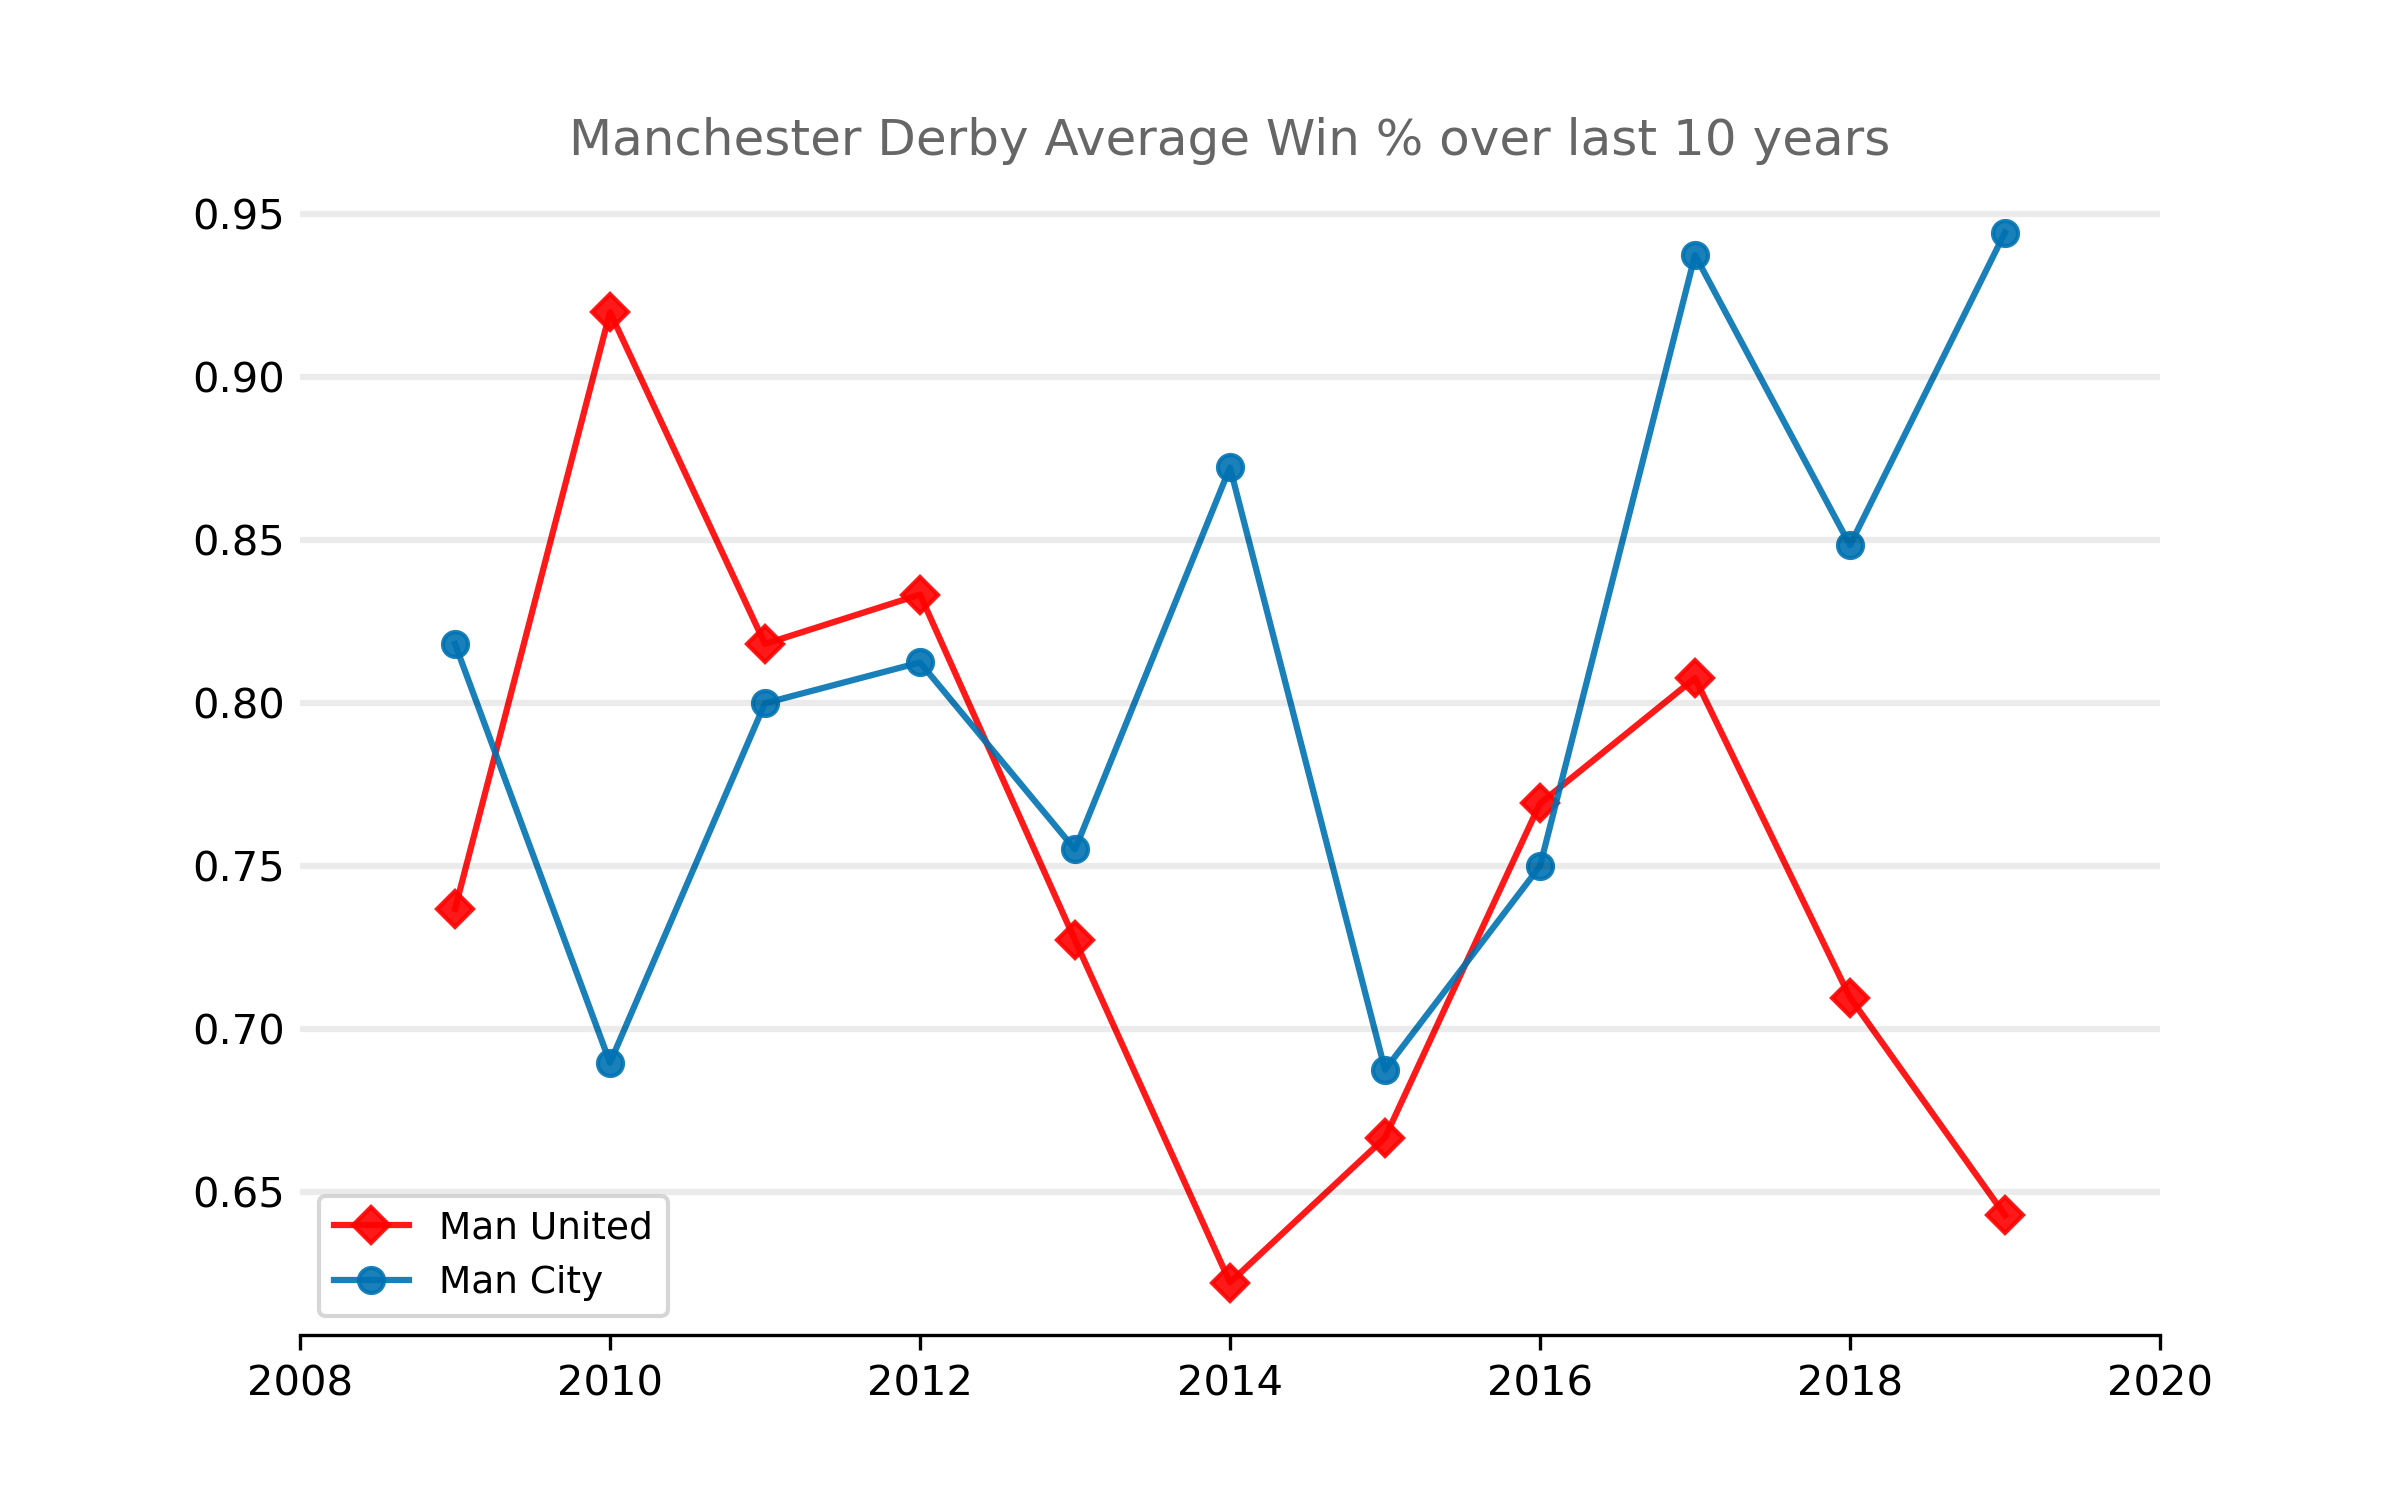

In [25]:
fig = plt.figure(figsize = (8, 5))
plt.plot(united.index, united['mean'], 'D-', color = 'r', alpha = 0.9, label = 'Man United')
line = plt.plot(city.index, city['mean'], 'o-', alpha = 0.9, label = 'Man City')

ax = plt.gca()
plt.legend(fontsize=9, loc = 0)
plt.title('Manchester Derby Average Win % over last 10 years', alpha = 0.6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xlim(xmin = 2008, xmax = 2020)
ax.tick_params(axis = 'y', which = u'both',length=0)

ypos = [0.65, 0.75, 0.85, 0.95, 0.7, 0.8, 0.9]
for i in ypos:
    ax.axhline(y=i, color = 'k', alpha = 0.08, linestyle = '-')
    
ax.set_alpha(0.5)